In [1]:
from importlib import reload
import flymovie as fm
import cnn_models.siamese_cnn as cn
import cnn_models.evaluate_models as ev
from flymovie.simnuc import Sim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
from importlib import reload
from sklearn.manifold import TSNE
import scipy.ndimage as ndi
import skimage as ski
%load_ext autoreload
%autoreload 2

Take source embedding and target embedding

Pattern match against source, get target distance to center, produce plots

In [2]:
def make_df(files):
    p = []
    for f in files:
        #print(f.split('_')[])

        p.append(f.split('_')[1:-1])

    p = np.array(p)
    p = p.astype(float) 
    df = pd.DataFrame(p, columns=['ntotal', 'hlb_diam','hlb_nmols', 'n_clusters', 'cluster_diam_mean', 'cluster_diam_var','cluster_nmols_mean','cluster_nmols_var','noise_sigma'])
    return df[['hlb_diam','hlb_nmols', 'n_clusters', 'cluster_diam_mean', 'cluster_diam_var','cluster_nmols_mean','cluster_nmols_var','noise_sigma']]

def match_embeddings(source, target, pattern, n=None, d=None):
    def dist_to_center(ref_arr, arr):
        center = ref_arr.mean(axis=0)
        sqdist = np.sum((arr - center) ** 2, axis=1)
        return np.sqrt(sqdist)
    
    em_source, names_source = source
    em_target, names_target = target
    names_source, names_target = np.array(names_source), np.array(names_target)

    match_rows = pd.Series(names_source).str.contains(pattern).to_numpy()

    match_names = names_source[match_rows]
    dists_target = dist_to_center(em_source[match_rows], em_target)
    dists_source = dist_to_center(em_source[match_rows], em_source[match_rows])
    
    # Get top n indexes
    topn_idxs = np.argsort(dists_target)[:n]
    topn_names = names_target[topn_idxs]
    print(dists_target[topn_idxs[-1]])

    plt.hist(dists_source, bins=50, alpha=0.5, density=True);
    plt.hist(dists_target, bins=50, alpha=0.5, density=True);

    df = make_df(topn_names)
    sn.pairplot(df[['n_clusters', 'cluster_diam_var','cluster_nmols_mean','cluster_nmols_var','noise_sigma']], height=2)
    return match_names, topn_names

#d = match_embeddings(, 'AA', 10)

In [55]:
source = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__real-nuclei-set3-matched-20220630__20220619-plussims-20220616-realreal.pkl')
#target = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__sims-zld-nc13-25nM-noise2-4ish_100k_EgdrVRpv__20220619-plussims-20220616-realreal.pkl')
target = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__20220630-zld-nc13-70nm-noisespread_VTBHgoTu__20220619-plussims-20220616-realreal.pkl')

1.0410521211460066


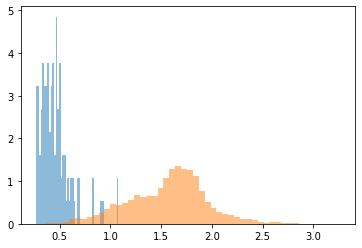

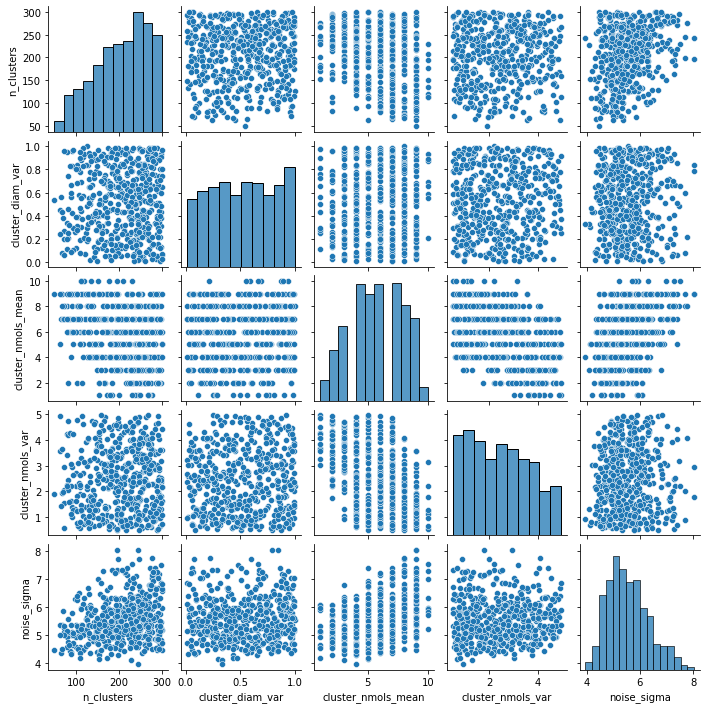

In [61]:
match_embeddings(source, target, 'zld-nc13-3',500)

0.5385533008845298


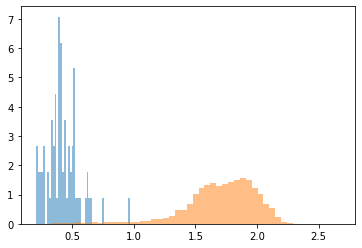

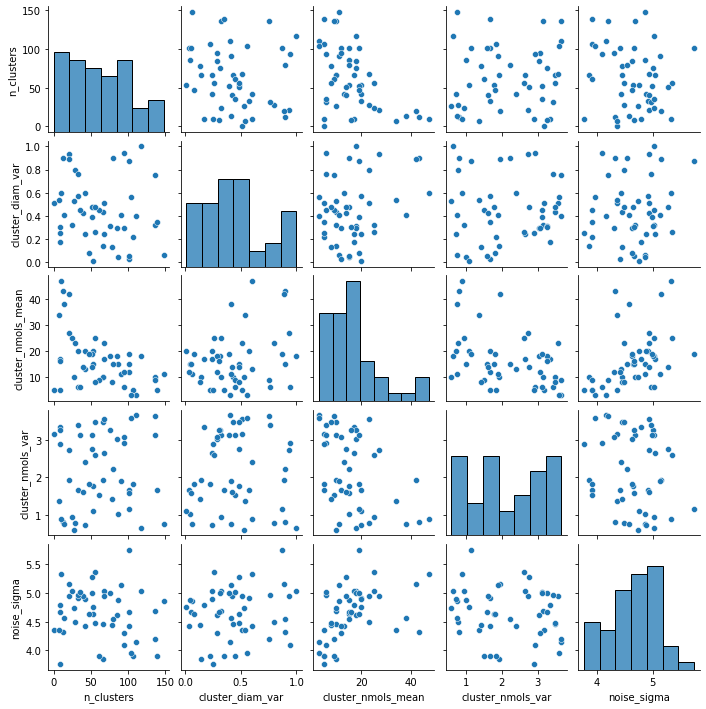

In [3]:
source = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__real-nuclei-set3-matched-20220630__20220619-plussims-20220616-realreal.pkl')
#target = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__sims-zld-nc13-25nM-noise2-4ish_100k_EgdrVRpv__20220619-plussims-20220616-realreal.pkl')
target = fm.load_pickle('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__20220630-rpb1-nc13-noisespread_JdAXzpOc__20220619-plussims-20220616-realreal.pkl')
names_source, names_target = match_embeddings(source, target, 'rpb1-nc13-4',50)

In [19]:
np.savetxt('/Users/michaelstadler/Desktop/from.txt', floog, fmt='%s')

In [4]:
def load_folder(folder):
    l = []
    for f in os.listdir(folder):
        if f[0] == '.':
            continue
        im = fm.load_pickle(os.path.join(folder, f))
        l.append(im)
    return np.array(l)

def load_matches(folder, files):
    l = []
    for f in os.listdir(folder):
        if f[0] == '.':
            continue
        if f in files:
            im = fm.load_pickle(os.path.join(folder, f))
            l.append(im)
    return np.array(l)

def view_matches(source_ims, target_ims):
    def equalize(smaller, bigger):
        reps = int(bigger.shape[0] / smaller.shape[0]) + 1
        new = np.tile(smaller, (reps,1,1,1))
        return new[:bigger.shape[0]]
    
    source = source_ims.copy()
    target = target_ims.copy()
    if source.shape[0] < target.shape[0]:
        source = equalize(source, target)
    elif source.shape[0] > target.shape[0]:
        target = equalize(target, source)
    print(source.shape, target.shape)
    fm.viewer([source, target])
    
    
    

In [11]:
os.listdir('/Volumes/stadler_5tb/')

PermissionError: [Errno 1] Operation not permitted: '/Volumes/stadler_5tb/'

In [62]:
target_ims = load_matches('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/matched_images', names_target)
source_ims = load_matches('/Volumes/stadler_5tb/real-nuclei-set3-matched-20220630', names_source)

PermissionError: [Errno 1] Operation not permitted: '/Volumes/stadler_5tb/real-nuclei-set3-matched-20220630'

In [60]:
view_matches(ims1, ims2)

(45, 34, 100, 100) (45, 34, 100, 100)


interactive(children=(Dropdown(description='Color', options=('cividis', 'gray_r', 'Gators', 'plasma', 'prism',…